## **HR Analytics - Employee Attrition Analysis & Prediction**

#### by Mandy Hong kh36422

### **Introduction**


One of the keys to success in an organization is the ability to hire and retain great talent. It helps minimize the costs in recruiting and contributes to the overall growth of the business. In this project, a dataset on employee attrition will be used to help find insights in the reasoning behind employee attrition. The dataset has both numerical and categorical data, with variables such as "Distance from home", "education field", "hourly rate", etc. This project aims to discover insights that will help a company make conscious decision about hiring talents and improve employee satisfaction and retention. The report will go through exploratory data analysis, data preparation, and use machine learning to drive the decision making process.

### **Target Audience**

The target audience of this project would be executives or Human Resources leader who are interested in uncovering insights around employee attrition. The modeling of employee attrition prediction will help the target audience make an informed decision about why employees attrition on a broad level and consider options that can prevent attrition of talents. 

### **Data Sources and Exploratory Data Analysis**


####**1. Data Sources**

Source of data: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset 
The dataset is found on kaggle.com, it is a fictional dataset created by data scientists from IBM. It is fictional because it is unlikely that a company would release real data on their employees to protect their personal information. However, the project will include processes that would be adaptable and helpful for an analysis for a real dataset. 

####**2. Importing the Libraries & Reading the Dataset**

In [ ]:
# basic operations
import numpy as np 
import pandas as pd
import datetime as dt
import seaborn as sns
import io
# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, precision_score, classification_report, average_precision_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")

In [ ]:
# Read csv file
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

####**3. Preliminary Data Analysis**

In [ ]:
# Show the first 5 rows of dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Changing binary representation of our target variable to 1/0
df.Attrition = df.Attrition.map({'Yes':1, 'No':0})

In [ ]:
# This shows us the information about the dataset and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# Showing how many columns and rows there are in the dataset
df.shape

(1470, 35)

In [ ]:
df.size

51450

In [ ]:
# Check duplicated values in dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

Based on this summary, the dataset has a total of 35 columns with 1470 unique entries. There is no null data or duplicates in the dataset, making it more usable. 

In [ ]:
# Descriptive Statistics: showing the count, mean, std, min/max of our dataset
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From here we can see the statistical summaries of the numerical data in the dataset. For example, the mean age of the employees documented in the dataset is 36.92. The average environmentsatisfation rating 2.72; average hourly rate is 65.89. Most of the columns are self-explanatory, according to the sources of the dataset, for ratings, a higher number means a higher rating/satisfaction. 

In [ ]:
df.groupby(["Attrition"]).size()

Attrition
0    1233
1     237
dtype: int64

####**4. Exploratory Data Analysis**

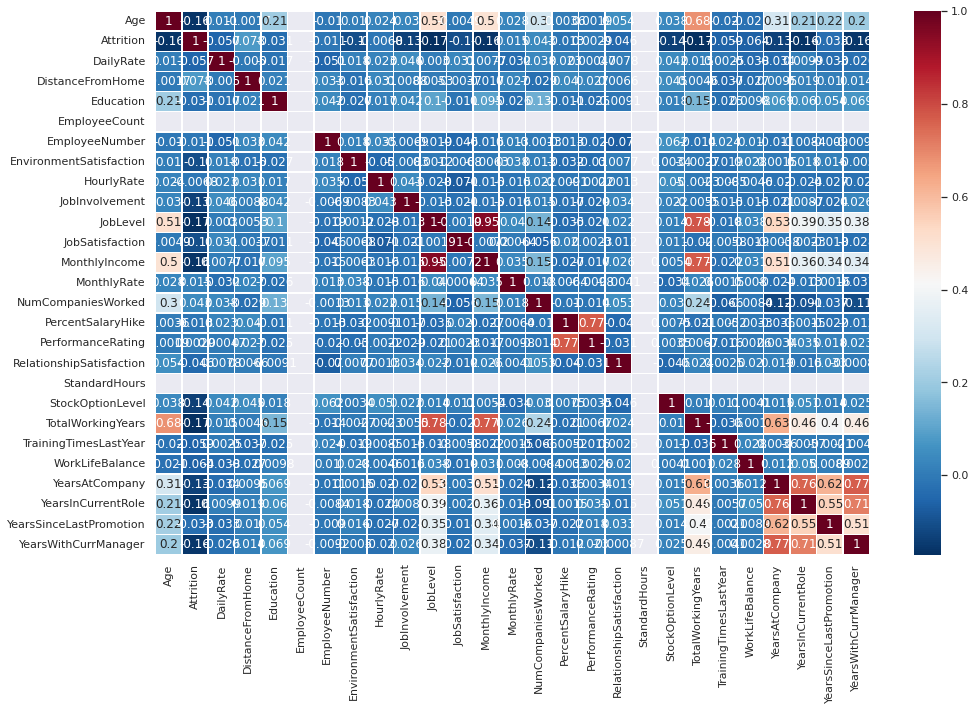

In [ ]:
# Use Pearson correlation to find pairwise correlation of all variables
pearson = df.corr(method='pearson')
pearson
plt.figure(figsize=(16, 10))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Some variables that are more related to the target variable Attrition: EnvironmentSatisfaction, JobInvolvement, Job level, JobSatisfaction, MonthlyIncome, StockOptionalLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearswithManager.

Since the correlation analysis only includes numercial variables, the below graphs will explore the categorical variables. 

Text(0.5, 1.0, 'Number of Attritions Reported by Education Field')

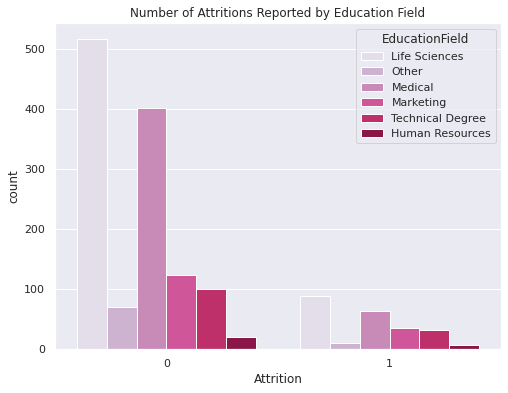

In [ ]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='EducationField',data=df, palette = 'PuRd').set_title("Number of Attritions Reported by Education Field")

This plot shows the number of attritions reported by Education Field. It seems that although technical degree, marketing, and human resources fields make up a small proportion of the dataset, the proportions of the attrited employees are higher. Below we look at the percentage of attrited employees by education field. 

In [ ]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size() / df.groupby(["EducationField"]).size()

EducationField
Human Resources     0.259259
Life Sciences       0.146865
Marketing           0.220126
Medical             0.135776
Other               0.134146
Technical Degree    0.242424
dtype: float64

In [ ]:
df[(df["Attrition"] == 1)].groupby(["EducationField"]).size()

EducationField
Human Resources      7
Life Sciences       89
Marketing           35
Medical             63
Other               11
Technical Degree    32
dtype: int64

In [ ]:
df[(df["Attrition"] == 0)].groupby(["EducationField"]).size()

EducationField
Human Resources      20
Life Sciences       517
Marketing           124
Medical             401
Other                71
Technical Degree    100
dtype: int64

This shows that human resources, technical degree, and marketing have a higher percentage of attrition. 

Text(0.5, 1.0, 'Number of Attritions Reported by Over Time')

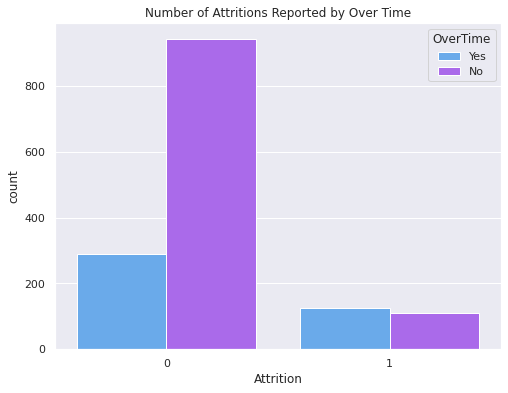

In [ ]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='OverTime',data=df, palette = 'cool').set_title("Number of Attritions Reported by Over Time")

Text(0.5, 1.0, 'Number of Attritions Reported by Job Roles')

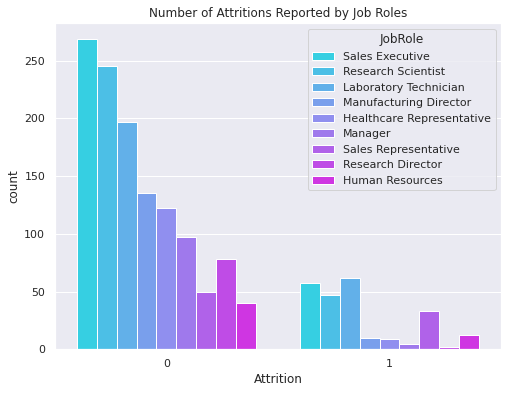

In [ ]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='JobRole',data=df, palette = 'cool').set_title("Number of Attritions Reported by Job Roles")

In [ ]:
df[(df["Attrition"] == 1)].groupby(["OverTime"]).size() / df.groupby(["OverTime"]).size()

OverTime
No     0.104364
Yes    0.305288
dtype: float64

About 30.5% of overtime employees have attrited, meaning that it is a factor that needs to be accounted for employee attrition.

Text(0.5, 1.0, 'Number of Attritions Reported by Amount of Business Travel')

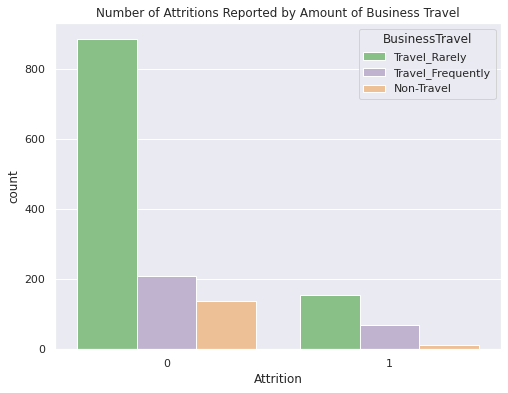

In [ ]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='BusinessTravel',data=df, palette = 'Accent').set_title("Number of Attritions Reported by Amount of Business Travel")

In [ ]:
df[(df["Attrition"] == 1)].groupby(["BusinessTravel"]).size() / df.groupby(["BusinessTravel"]).size()

BusinessTravel
Non-Travel           0.080000
Travel_Frequently    0.249097
Travel_Rarely        0.149569
dtype: float64

The percentage of attrition among Travel_Frequently group is much higher than the other two groups. 

Text(0.5, 1.0, 'Number of Attritions Reported by Gender')

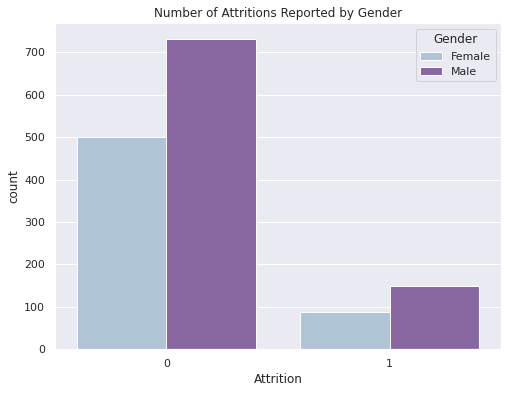

In [ ]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='Gender',data=df, palette = 'BuPu').set_title("Number of Attritions Reported by Gender")

In [ ]:
df[(df["Attrition"] == 1)].groupby(["Gender"]).size() / df.groupby(["Gender"]).size()

Gender
Female    0.147959
Male      0.170068
dtype: float64

This graph shows that about 250 employees departed the company, while about 1200 employees stayed. There is also a larger proportion of male in this dataset. The above statistics shows that 15% of female employees attrited and 17% of male employees attrited. However, considering that male employees make up a big portion of the sample, this difference is unlikely statistically significant. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



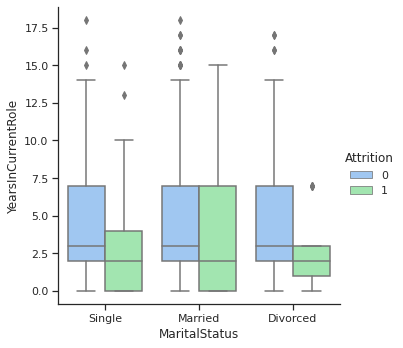

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("MaritalStatus", "YearsInCurrentRole", "Attrition", data=df, kind="box")

Text(0.5, 1.0, 'Number of Attritions Reported by Marital Status')

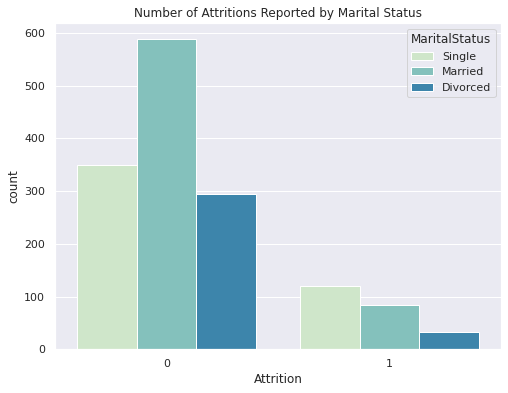

In [ ]:
plt.style.use('seaborn-pastel')
plt.rcParams['figure.figsize'] = (8, 6)

sns.countplot(x=df['Attrition'],hue='MaritalStatus',data=df, palette = 'GnBu').set_title("Number of Attritions Reported by Marital Status")

In [ ]:
df[(df["Attrition"] == 1)].groupby(["MaritalStatus"]).size() / df.groupby(["MaritalStatus"]).size()

MaritalStatus
Divorced    0.100917
Married     0.124814
Single      0.255319
dtype: float64

The first graph shows the distribution of Years in Current Role by Marital Status, Attrition vs No Attrition. And the second graph shows the attrition by Marital Status. It seems that the for non-attrition, an average employee tends to have worked longer at the company. However, for married and attrited employees, the distribution of Years in Current Role span from 0 to 7.5. Overall, about half of the employees are married and only a small percentage of them chooses to leave the company. 

In [ ]:
df[(df["Attrition"] == 1)].groupby(["JobRole"]).size() / df.groupby(["JobRole"]).size()

JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
dtype: float64

This statistics show the percentage of attrition by Job role, almost 40% of attrited employees are sales representatives, followed by laboratory technicians and human resources positions.

###**Data Preparation and Modeling**

####**1. Data Preparation**

In [ ]:
df2 = df.copy()

In [ ]:
# We define our own function to target encode all the categorical variables, replacing them with associated mean relation to fraud_reported. 
# This is because most models only take numerical variables.

def numericizer(df, col, new_df_name):
  new_df_name = df[[col,'Attrition']].groupby([col],as_index = False).mean().sort_values(by = 'Attrition', ascending = False)
  df[col] = df[col].replace(new_df_name[col].values, 1 - new_df_name['Attrition'].values)
  new_df_name = None

In [ ]:
lets_use_correlation = ['BusinessTravel', 'Department', 'EducationField',
                        'JobRole', 'MaritalStatus']

for i in lets_use_correlation:
  try:
    numericizer(df2, i, "blah")
  except: 
    print(i)
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.850431,1102,0.793722,1,2,0.853135,1,1,2,Female,94,3,2,0.825153,4,0.744681,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,0.750903,279,0.861602,8,1,0.853135,1,2,3,Male,61,2,2,0.839041,2,0.875186,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,0.850431,1373,0.861602,2,2,0.865854,1,4,4,Male,92,2,1,0.760618,3,0.744681,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,0.750903,1392,0.861602,3,4,0.853135,1,5,4,Female,56,3,1,0.839041,3,0.875186,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,0.850431,591,0.861602,2,1,0.864224,1,7,1,Male,40,3,1,0.760618,2,0.875186,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,0.750903,884,0.861602,23,2,0.864224,1,2061,3,Male,41,4,2,0.760618,4,0.875186,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,0.850431,613,0.861602,6,1,0.864224,1,2062,4,Male,42,2,3,0.931298,1,0.875186,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,0.850431,155,0.861602,4,3,0.853135,1,2064,2,Male,87,4,2,0.931034,2,0.875186,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,0.750903,1023,0.793722,2,3,0.864224,1,2065,4,Male,63,2,2,0.825153,2,0.875186,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [ ]:
# Changing binary representation of Gender, Overtime variables to 1/0
df2.Gender = df.Gender.map({'Male':1, 'Female':0})
df2.OverTime = df.OverTime.map({'Yes':1, 'No':0})

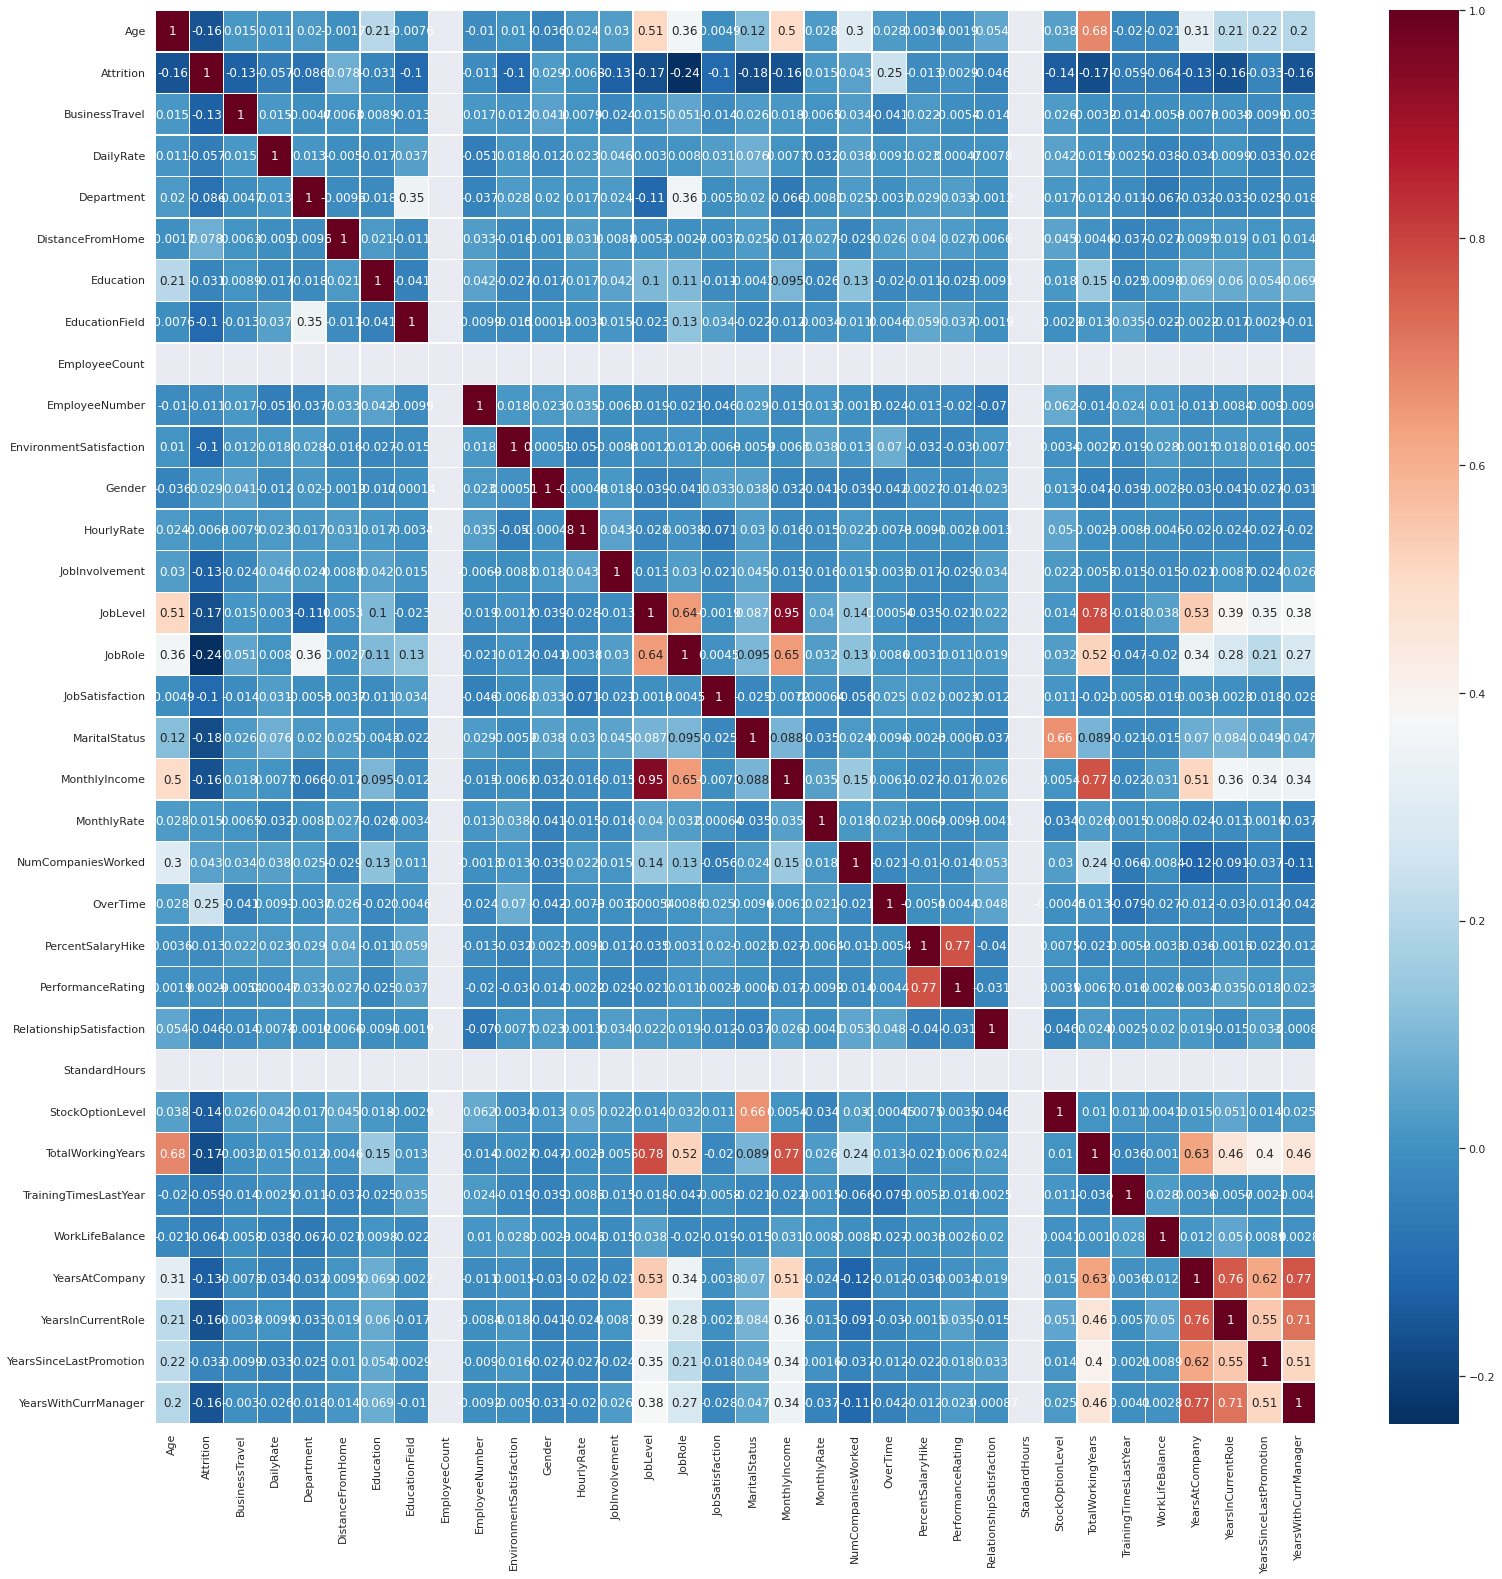

In [ ]:
# After we changed all the categorical variables to numerical using mean encoding, 
# we can run pairwise correlation again to see the correlation between all the variables
pearson = df2.corr(method='pearson')
pearson
plt.figure(figsize=(26, 26))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

It shows that the categorical variables that we transformed do show a relationship with the target variable. Especailly OverTime and JobRole. 

####**2. Feature Selection**

This heatmap again tells us how related the variables to Attrition. We will pick the ones that have an absolute correlation value greater than 0.1 for our model

In [ ]:
# Picking the features that have absolute correlation value greater than 0.1 
df3 = df2[['Attrition', 'Age', 'BusinessTravel', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

####**3. Modeling**

In [ ]:
# Separating dataset into x & y, where y is the target variable
x = df3.drop('Attrition', axis = 1)
y = df3['Attrition']
# Train test split using industry standard 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1176, 16) (1176,)
Test set: (294, 16) (294,)


We picked the logistic regression model to classify our data because our target feature, Attrition, is a binary feature. We used the 'newton-cg' solver because we are predicting Attrition using multiple features at once.

In [ ]:
# Building logisticregression model to fit training model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, solver='newton-cg', max_iter=800, random_state=86).fit(x_train,y_train)
LR

LogisticRegression(max_iter=800, random_state=86, solver='newton-cg')

In [ ]:
# Using training model to predict
yhat_train = LR.predict(x_train)
yhat_test = LR.predict(x_test)

####**4. Model Accuracy**

In [ ]:
# Create confusion matrix function
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

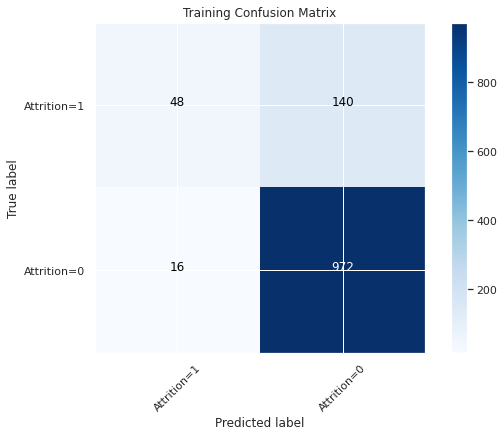

In [ ]:
# Compute confusion matrix for training data
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'], normalize= False,  title='Training Confusion Matrix')

In [ ]:
# Scoring the training model
print (classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.93       988
           1       0.75      0.26      0.38       188

    accuracy                           0.87      1176
   macro avg       0.81      0.62      0.65      1176
weighted avg       0.85      0.87      0.84      1176



The confusion matrix shows the number of predicted values and the actual values. The model has an accuracy of 87%. It does very well in predicting non-attrited employees, about 98% of the time based on the recall score. However, the recall score for attrited employees is only 26%. 

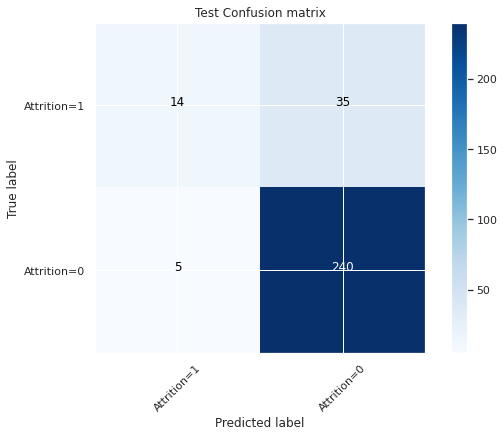

In [ ]:
# Compute confusion matrix for testing data
cnf_matrix = confusion_matrix(y_test, yhat_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attrition=1','Attrition=0'],normalize= False,  title='Test Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat_test))


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.74      0.29      0.41        49

    accuracy                           0.86       294
   macro avg       0.80      0.63      0.67       294
weighted avg       0.85      0.86      0.84       294



Our f1 score on the testing set was not less than the f1 score on the training set, so we likely did not overfit. However, the recall score for the testing data is larger than for the training data, this means that our model identifies attrition better in an unfamiliar set of data. 

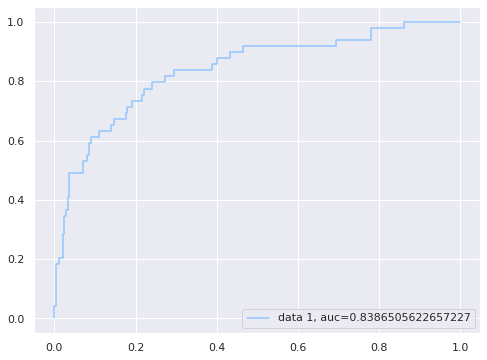

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = LR.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. The AUC curve for this model is 0.84, which means it is moderately a good classifier. 

####**5. Logistic Regression Analysis**

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Optimization terminated successfully.
         Current function value: 0.352552
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.202     
Dependent Variable:   Attrition          AIC:                1068.5037 
Date:                 2021-12-07 03:14   BIC:                1153.1920 
No. Observations:     1470               Log-Likelihood:     -518.25   
Df Model:             15                 LL-Null:            -649.29   
Df Residuals:         1454               LLR p-value:        4.0102e-47
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Age                     -0.0109   0.0119 -0.9159 0.3597 -0.0342

In [ ]:
# Reselect features that have a p-value less than 0.05
df4 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [ ]:
# Separating dataset into x & y, where y is the target variable
x1 = df4.drop('Attrition', axis = 1)
y1 = df4['Attrition']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.356714
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.192     
Dependent Variable:   Attrition          AIC:                1068.7397 
Date:                 2021-12-07 03:14   BIC:                1121.6698 
No. Observations:     1470               Log-Likelihood:     -524.37   
Df Model:             9                  LL-Null:            -649.29   
Df Residuals:         1460               LLR p-value:        1.0767e-48
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.3565   0.9490  6.6983 0.0000  4.4966

In [ ]:
# Continue to Reselect features that have a p-value less than 0.05
df5 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel', 'YearsInCurrentRole', 'YearsWithCurrManager']]

In [ ]:
# Separating dataset into x & y, where y is the target variable
x1 = df5.drop('Attrition', axis = 1)
y1 = df5['Attrition']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.357260
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.191     
Dependent Variable:   Attrition          AIC:                1068.3445 
Date:                 2021-12-07 03:14   BIC:                1115.9817 
No. Observations:     1470               Log-Likelihood:     -525.17   
Df Model:             8                  LL-Null:            -649.29   
Df Residuals:         1461               LLR p-value:        4.0707e-49
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.2164   0.9411  6.6056 0.0000  4.3719

In [ ]:
# Continue to Reselect features that have a p-value less than 0.05
df6 = df3[['Attrition', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'OverTime', 'StockOptionLevel']]

In [ ]:
# Separating dataset into x & y, where y is the target variable
x1 = df6.drop('Attrition', axis = 1)
y1 = df6['Attrition']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,x1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.363654
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.177     
Dependent Variable:   Attrition          AIC:                1083.1425 
Date:                 2021-12-07 03:14   BIC:                1120.1936 
No. Observations:     1470               Log-Likelihood:     -534.57   
Df Model:             6                  LL-Null:            -649.29   
Df Residuals:         1463               LLR p-value:        1.0081e-46
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
EducationField           6.7398   0.9304  7.2437 0.0000  4.9162

After running multiple logistic regression analyses, we have a model with variables that are all statisfically significant. However, after I tried applying this model to the dataset using 7 variables, the model does not predict attrition as well as using 16 features. However, this analysis does show that these 7 variables are the most important when it comes to employee attrition. Education Field as mentioned before contributes a lot to whether an employee will attrit. EnvironmentSatisfaction, JobInvolvement, JobRole, JobSatisfaction, StockOptionLevel are all negatively correlated with attrition. Meaning that higher the employee's satisfaction with the company, the less likely they will attrit. Among all these variables, StockOptionlevel has the biggest impact (since JobRole is one-hot encoded instead of a numerical variable, it is hard to interpret the coeifficient). For positive correlations, OverTime has a big impact on employee attrition. Overtime employees are more likely to attrit.

###**Discussion**

####**1. Observations**

Based on the data analysis early in the project, we found that there are some numerical variables that are correlated with Attrition: EnvironmentSatisfaction, JobInvolvement, Job level, JobSatisfaction, MonthlyIncome, StockOptionalLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearswithManager. 

However, there are some other categorical variables that are also important. For example, we found that in the dataset, 



*   employees with a background in technical degrees, human resources, and marketing fields have a higher tendency in attrition compared to medical, life sciences and other fields. 
*   30% of overtime employees have attrited compared to employees that don't work overtime. Frequent Business Travels also contribute to attrition.
*   In terms of Job Role, almost 40% of attrited employees are sales representatives, followed by laboratory technicians and human resources positions.
*   Stock Option level is also a big factor that contributes to attrition. i.e. if the company offers more stock options for the employees, they are less likely to attrit. 
*   The analysis also shows that the higher the employee is involved in their jobs, the less likely they are to leave the company. 








 






####**2. Implications**

Based on our observations, we can draw the following implications for companies: 

*   Employees with background in technical degrees, human resources, and marketing fields need to be looked after based on their job roles. 
*   Companies should reduce employee's overtime work to increase job satisfaction
*   Companies need to offer more incentives for sales representatives, laboratory technicians and human resources positions. For example, by reducing their work hours and offering some flexibility. 
*   Companies should consider offering more stock options for employees. 
*   For all positions, companies should help increase employees' involvement in the job to show that they can make a true contribution to the company. 








####**3. Limitations**

In this project, a logistic regression model was created to predict employee attritions, with accuracy of 86% and an AUC score of 84%. The model can predict attrition 29% of the time with an F1 score of 41% for positive attrition. This model serves as a good classifier for attritions of employees, but it also might lead to false negatives, i.e. employees that attrit but shown as non-attrition. Companies can use the model for reference but it only helps to a certain extent with employee attritions. Companies need to spend some time considering the important factors that contribute to employee attritions based on these models and improving them to prevent loss of talent. 

###**Conclusion**

At the start of this project, we identified the importance of talent retention for a company and collected a dataset on employee information and attrition. We then completed an exploratory data analysis, creating heatmaps to show correlations between variables, and visualizations to understand the demographics and features of attrited employees. Using logistic regression algorithms, we built a model that helps predict employee attrition with an accuracy of 86%. Then we concluded that there are some variables that are important factors in an employee's decision to attrit such as education fields, job roles, satisfaction, etc. We also developed implications for companies with actions to consider in order to prevent future loss of talent. 
Overall, this project was a great practice utilizing data science concepts and machine learning algorithms. The methods used in this project can be used to help a company predict employee attrition using their own data on their employees. The insights uncovered through classification algorithms can be used to develop action items that help prevent future loss of talent.

### **Sources**

[Building a Logistic Regression in Python Step-by-Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

[Understanding Logistic Regression in Python](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)

[Scikit-Learn Logistic Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Python Sklearn Logistic Regression Tutorial with Example](https://machinelearningknowledge.ai/python-sklearn-logistic-regression-tutorial-with-example/)

[Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
